# EDA on Netflix Dataset

## **`Table of Contents`**

1. [**Introduction**](#1)
   1. [**1.1 Project Description**]
   2. [**1.2 Data Description**]
2. [**Acquiring and Loading Data**](#2)
   1. [**2.1 Importing Libraries:**]
   2. [**2.2 Loading Data**]
   3. [**2.3 Basic Data Exploration**]
   4. [**2.4 Areas to Fix**]
3. [**Data Proprocessing**](#3)
   1. [**3.1 Pre-processing Details:**]
   2. [**3.2 Rename Columns**]
   3. [**3.3 Drop Redundant Columns**]
   4. [**3.4 Changing Data Types**]
   5. [**3.5 Dropping Duplicates**]
   6. [**3.6 Handling Missing Values**]
   7. [**3.7 Handling Unreasonable Data Ranges**]
   8. [**3.8 Feature Engineering / Transformation**]
4. [**Data Analysis**](#4)
   1. [**4.1 Exploring `Column Name`**]
5. [**Conclusion**](#5)
   1. [**5.1 Insights**]
   2. [**5.2 Suggestions**]
   3. [**5.3 Possible Next Steps**]
6. [**Epilogue**](#6)
   1. [**6.1 References**]
   2. [**6.2 Information about the Author:**]

---

# **`1. Introduction`**



[<img src="https://storage.googleapis.com/kaggle-datasets-images/434238/824878/30c0ef57882454a0419a348088aa2306/dataset-thumbnail.jpg?t=2019-12-04-06-00-44">]

##  **1.1 Project Description**

**Goal/Purpose:**

This project is an Exploratory Data Analysis (EDA) on the dataset "netflix_titles.csv" which contains information about various movies and TV shows available on the Netflix platform. The goal of this project is to provide insights and understanding about the dataset, which can be useful for various purposes such as content recommendation, trend analysis, and business strategy.

The purpose of this notebook is to guide you through the EDA process and help you practice your data analysis skills. By exploring and analyzing this dataset, you can learn how to extract valuable information, identify patterns, and draw meaningful conclusions. This project is important for someone to read as it can serve as a reference for conducting EDA on similar datasets, and it can also help you improve your data analysis and problem-solving abilities.

<p>&nbsp;</p>

**Questions to be Answered:**



**`Question No 01:`** What is the distribution of the "type" column (movie vs. TV show) over the years?

**`Question No 02:`** Which countries have the most content available on Netflix, and how has this changed over time?

**`Question No 03:`** What are the most common genres or "listed_in" categories for movies and TV shows, and how do they differ?

**`Question No 04:`** How has the average duration of movies and TV shows changed over the years?

**`Question No 05:`** Which directors or actors have the most titles in the dataset, and are there any trends or patterns in their content?

**`Question No 06:`** Are there any relationships between the rating, duration, and genre of the Netflix titles?

**`Question No 07:`** How does the distribution of release years differ between movies and TV shows?

**`Question No 08:`** Can you identify any seasonal or monthly patterns in the release of new content on Netflix?

**`Question No 09:`** Are there any notable differences in the distribution of titles between the "Documentaries", "Dramas", and "Comedies" genres?

**`Question No 10:`** Can you find any significant correlations between the variables in the dataset, and how might these insights be useful for content recommendation or marketing strategies?

<p>&nbsp</p>

**Assumptions:**

- The dataset is complete and accurate, with no major missing data or errors.
- The date_added column accurately represents when the title was added to Netflix.
- The metadata (director, cast, country, etc.) is reliable and up-to-date.
  
**Methodology:**

- Perform data cleaning and preprocessing (handle missing values, convert data types, etc.)
- Conduct univariate and bivariate analysis to understand the distribution and relationships between variables.
- Explore the data using visualization techniques (e.g., histograms, scatter plots, bar charts) to identify patterns and trends.
- Perform statistical analysis (e.g., correlation, regression) to uncover deeper insights.
- Document the findings and insights in a clear and organized manner.

**Scope:**

- This project will focus on analyzing the Netflix titles dataset and providing insights that can be useful for content providers, subscribers, and researchers.
- The analysis will be limited to the information available in the provided dataset and will not include any external data sources.
- The goal is to practice EDA skills and provide a comprehensive understanding of the Netflix content landscape.

<p>&nbsp;</p>

## **1.2 Data Description**

**Content:**

This dataset is a CSV (Comma-Separated Values) file of 10 data points which contains information about various movies and TV shows available on the Netflix platform.

**Description of Attributes:**

| Column       | Description                                                                                                    |
| ------------ | -------------------------------------------------------------------------------------------------------------- |
| show_id      | Unique identifier for each title                                                                           |
| type         | Indicates whether the title is a movie or a TV show                                                       |
| title        | Title of the movie or TV show                                                                              |
| director     | Director of the movie                                                                                      |
| cast         | Actors in the movie or TV show                                                                             |
| country      | Country where the title was produced                                                                       |
| date_added   | Date the title was added to Netflix                                                                        |
| release_year | Year the title was originally released                                                                     |
| rating       | Content rating of the title                                                                                |
| duration     | Runtime of the movie or number of seasons for TV shows                                                     |
| listed_in    | Genres or categories the title belongs to                                                                  |
| description  | Brief description of the plot or premise of the title                                                      |

**Acknowledgements:**

This dataset is provided by Netflix. The original dataset was scraped by Kaggle and the original source can be found on [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows).

---

# **`2. Aquiring & Loading Data`**


In [4]:
# 2.0 Interactive Output Function
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

def print_interact(show_summary, df):
  interact(show_summary, df=widgets.fixed(df))

## **2.1 Importing Libraries:**

In [5]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **2.2 Loading Data**

In [6]:
# # Load DataFrames
df = pd.read_csv('../../datasets/netflix_titles.csv')

## **2.3 Basic Data Exploration**

In [7]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 8807
Columns count: 12


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### *2.3.1 Check Data Types*

In [10]:
# # Show data types
def info_of_data():
    df.info()
print_interact(info_of_data,df)



interactive(children=(Output(),), _dom_classes=('widget-interact',))

- `release_year` is an **integer**.
- `date_added` should be a **datetime** type instead.
- `remaining all` columns are **strings**.

### *2.3.2 Check Missing Data*

In [11]:
# Print percentage of missing values

def missing_values():
    missing_percent = df.isnull().sum().sort_values(ascending=False)
    if(missing_percent.sum()):
        print('---- Percentage of Missing Values (%) -----')
        print(missing_percent[missing_percent>0]/len(df)*100)
    else:
        print('None')
print_interact(missing_values,df)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### 2.3.3 Check for Duplicate Rows

In [12]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### 2.3.4 Check Uniqueness of Data

In [13]:
print('---- No of Unique Values -----')
df.nunique()

---- No of Unique Values -----


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
# Print the percentage similarity of values (the lower %, the better)
print('---- Percentage Similarity of Values (%) -----')
print(100/df.nunique().sort_values())

---- Percentage Similarity of Values (%) -----
type            50.000000
rating           5.882353
release_year     1.351351
duration         0.454545
listed_in        0.194553
country          0.133690
date_added       0.056593
director         0.022085
cast             0.013001
description      0.011396
show_id          0.011355
title            0.011355
dtype: float64


### *2.3.5 Check Data Range*

In [15]:
# # Print summary statistics
df.describe(include='all')
# using skimpy library
import skimpy
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### *2.3.6 Checking Value Counts of Categorical Columns*

In [16]:
# checking value counts of df for categorical columns
print('---- Value Counts -----')
for col in df.select_dtypes(include='object').columns:
    if(df[col].nunique()<40):
        print(f'---- {col} ----')
        print(df[col].value_counts())

---- Value Counts -----
---- type ----
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
---- rating ----
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [17]:
 for col in df.select_dtypes(include='object').columns:
        if(df[col].nunique()<40):
            print(f'---- {col} ----')
            print(df[col].value_counts(),'\n')
        else:
            print(f'---- {col} ----')
            print('more than 40 unique values\n')

---- show_id ----
more than 40 unique values

---- type ----
type
Movie      6131
TV Show    2676
Name: count, dtype: int64 

---- title ----
more than 40 unique values

---- director ----
more than 40 unique values

---- cast ----
more than 40 unique values

---- country ----
more than 40 unique values

---- date_added ----
more than 40 unique values

---- rating ----
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64 

---- duration ----
more than 40 unique values

---- listed_in ----
more than 40 unique values

---- description ----
more than 40 unique values



In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **2.4 Areas to Fix**
**Data Types**
- [the duration column should be of numeric dtype, and of one scale]
- [date added colume should be of datetime dtype]

**Missing Data**

| column_name | NA | NA % |
|----------------|:--:|:----:|
| show_id | 0 | 0 |
| type | 0 | 0 |
| title | 0 | 0 |
| director | 2634 | 29.91 |
| cast | 825 | 9.37 |
| country | 831 | 9.44 |
| date_added | 10 | 0.11 |
| rating | 4 | 0.05 |
| duration | 3 | 0.03 |
| listed_in | 0 | 0 |
| description | 0 | 0 |

**Duplicate Rows**
- [There are no duplicated rows]

**Uniqueness of Data**
|Column_name|nunique(%)
--------|--------
|type|50.000000|
|rating|5.882353|
|release_year|1.351351|
|duration|0.454545|
|listed_in|0.194553|
|country|0.133690|
|date_added|0.056593|
|director|0.022085|
|cast|0.013001|
|description|0.011396|
|show_id|0.011355|
|title|0.011355|

---

# **`3. Data Preprocessing`**

## **3.1 Pre-processing Details:**

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

## **3.2 Rename Columns**

In [19]:
# renaming column
df.rename(columns={'listed_in':'categories'},inplace=True)

In [20]:
# # Verify columns are renamed
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'description'],
      dtype='object')

## **3.3 Drop Redundant Columns**

In [21]:
# there are no rerebundant columns

## **3.4 Changing Data Types**

### **3.4.1 `Date_added` to datetime64:**

In [22]:
# Convert columns to the right data types
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [23]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

### **3.4.2 `Duration` to int64:**

In [24]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [25]:
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [26]:
# making another column of duration in seasons



## **3.5 Dropping Duplicates**

In [27]:
# there are no duplicates in the data

## **3.6 Handling Missing Values**

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
categories         0
description        0
dtype: int64

In [29]:
# droping the rows with missing values in director
df.dropna(subset=['director'],inplace=True)

In [30]:
# replacing the missing values in cast with 'Unknown'
df['cast'].fillna('Unknown',inplace=True)

C:\Users\anony_khan\AppData\Local\Temp\ipykernel_10812\3928961797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown',inplace=True)


In [31]:
# handling missing values in country
df.dropna(subset=['country'],inplace=True)

In [32]:
# handling missing values in date_added
df.dropna(subset=['date_added'],inplace=True)

In [33]:
# dropping the rows with missing values in rating
df.fillna(df['rating'].mode()[0],inplace=True)

In [34]:
df.dropna(subset=['duration'],inplace=True)

## **3.7 Handling Unreasonable Data Ranges**

In [35]:
# checking the release year unique values by sorting them
df['release_year'].sort_values().unique()

array([1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [36]:
# there are no unreasonable data ranges to handle

## **3.8 Feature Engineering / Transformation**

In [37]:
df['type'].value_counts()

type
Movie      5562
TV Show     184
Name: count, dtype: int64

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# as there are more then 88% of the values are missing so we can make dataframes for movies and tv shows separately
df_movies = df[df['type']=='Movie']

In [40]:
# now we can drop the type column in both dataframes
df_movies.drop(columns='type',inplace=True)

In [41]:
df_movies['duration'].unique()

array(['90 min', '125 min', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '92 min', '80 min', '128 min', '143 min', '119 min',
       '114 min', '94 min', '118 min', '108 min', '117 min', '121 min',
       '142 min', '113 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '105 min', '86 min', '229 min', '76 min', '89 min',
       '110 min', '156 min', '112 min', '129 min', '107 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '64 min',
       '59 min', '70 min', '111 min', '69 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '81 min', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '13 min', '77 min',
       '74 min', '49 min', '58 min', '72 min', '78 min', '132 min',
       '140

In [42]:
# droping the row contain TV-MA in duration column
df_movies = df_movies[~df_movies['duration'].str.contains('TV-MA')]


In [43]:
df_movies['duration'] = df_movies['duration'].astype(str).str.replace('min','').astype(float)


In [44]:
df_tv_shows = df[df['type']=='TV Show']

In [45]:
df_tv_shows.drop(columns='type',inplace=True)

In [46]:
df_tv_shows['duration'] = df_tv_shows['duration'].str.replace(' Season','').replace('Seasons','').str.replace('s','').astype(int)


# *`4. Data Analysis`*


Here is where your analysis begins. You can add different sections based on your project goals.

## **`Question No 01:`** What is the distribution of the "type" column (movie vs. TV show) over the years?


In [47]:
# Code and visualization
# **`Question No 01:`** What is the distribution of the "type" column (movie vs. TV show) over the years?
q1 = df.groupby(['release_year','type']).size().unstack()
px.line(q1, x=q1.index, y=['Movie','TV Show'], title='Distribution of Movies and TV Shows over the years')


In [48]:
px.bar(q1, x=q1.index, y=['Movie','TV Show'], title='Distribution of Movies and TV Shows over the years')

**Observations**
-

1. The number of movies has increased over the years.
2. The number of TV shows has also increased over the years.
3. The number of movies is higher than TV shows in all years.
4. The number of movies is increasing at a higher rate than TV shows.
5. The number of TV shows is decresing after 2020
6. The number of movies is decreasing after 2018

## **`Question No 02:`** Which countries have the most content available on Netflix, and how has this changed over time?

In [78]:
# adding type column in q2
q2 = df.groupby(['country','type']).size().unstack().sort_values('Movie',ascending=False).head(10)


In [79]:
q2

type,Movie,TV Show
country,,
United States,2000.0,45.0
India,881.0,9.0
United Kingdom,191.0,20.0
Canada,116.0,3.0
Spain,95.0,11.0
Egypt,90.0,NaN
Nigeria,86.0,4.0
Indonesia,77.0,NaN
France,75.0,6.0


In [90]:
# making a stacked bar chart
px.bar(q2, x=q2.index, y=['Movie','TV Show'], title='Top 10 countries with the most content available on Netflix', width = 1400, height = 800)

In [100]:
# we have to group by it thorugh the type column
q3 = df.groupby(['release_year','type'])['country'].value_counts().unstack().fillna(0).sort_values(by='release_year', ascending=False).head(10)

In [101]:
q3

country               , France, Algeria  Argentina  \
release_year type                                    
2021         TV Show                0.0        0.0   
             Movie                  0.0        1.0   
2020         TV Show                0.0        2.0   
             Movie                  0.0        7.0   
2019         TV Show                0.0        0.0   
             Movie                  0.0        6.0   
2018         TV Show                0.0        0.0   
             Movie                  0.0        8.0   
2017         TV Show                0.0        0.0   
             Movie                  0.0        2.0   

country               Argentina, Brazil, France, Poland, Germany, Denmark  \
release_year type                                                           
2021         TV Show                                                0.0     
             Movie                                                  0.0     
2020         TV Show                                                0.0     
             Movie                                                  0.0     
2019         TV Show                                                0.0     
             Movie                                                  0.0     
2018         TV Show                                                0.0     
             Movie                                                  0.0     
2017         TV Show                                                0.0     
             Movie                                                  1.0     

country               Argentina, Chile  Argentina, Chile, Peru  \
release_year type                                                
2021         TV Show               0.0                     0.0   
             Movie                 0.0                     0.0   
2020         TV Show               0.0                     0.0   
             Movie                 0.0                     0.0   
2019         TV Show               0.0                     0.0   
             Movie                 0.0                     0.0   
2018         TV Show               0.0                     0.0   
             Movie                 0.0                     0.0   
2017         TV Show               0.0                     0.0   
             Movie                 1.0                     0.0   

country               Argentina, France  \
release_year type                         
2021         TV Show                0.0   
             Movie                  0.0   
2020         TV Show                0.0   
             Movie                  0.0   
2019         TV Show                0.0   
             Movie                  0.0   
2018         TV Show                0.0   
             Movie                  0.0   
2017         TV Show                0.0   
             Movie                  1.0   

country               Argentina, France, United States, Germany, Qatar  \
release_year type                                                        
2021         TV Show                                               0.0   
             Movie                                                 0.0   
2020         TV Show                                               0.0   
             Movie                                                 0.0   
2019         TV Show                                               0.0   
             Movie                                                 0.0   
2018         TV Show                                               0.0   
             Movie                                                 0.0   
2017         TV Show                                               0.0   
             Movie                                                 1.0   

country               Argentina, Italy  Argentina, Spain  \
release_year type                                          
2021         TV Show               0.0               0.0   
             Movie                 0.0         

---

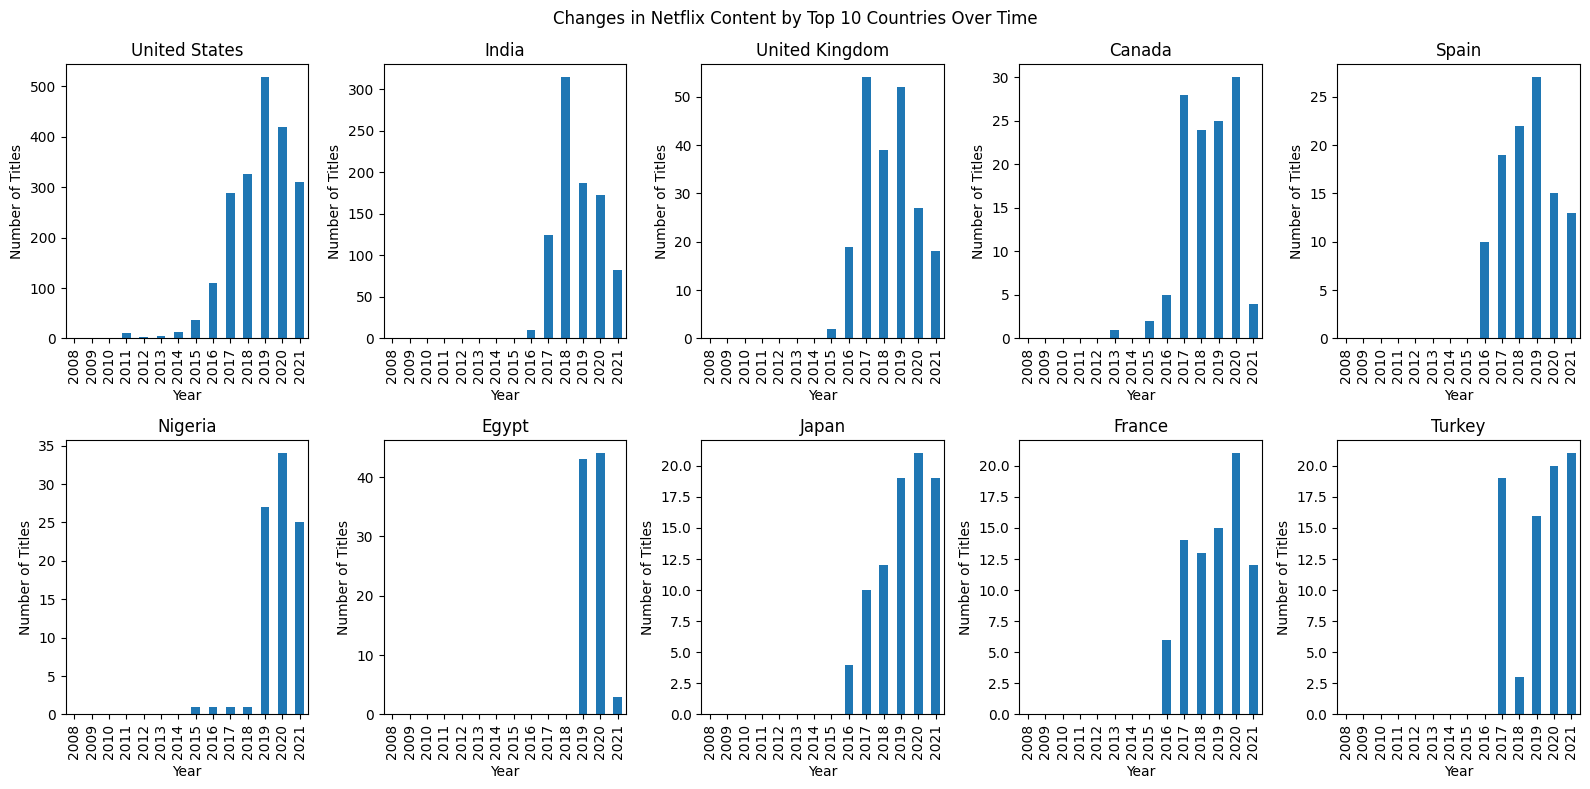

In [102]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Group the data by country and count the number of titles added each year
country_counts = df.groupby(['country', df['date_added'].dt.year])['show_id'].count().unstack(fill_value=0)

# Find the top 10 countries by total content
total_counts = country_counts.sum(axis=1).sort_values(ascending=False)
top_countries = total_counts.head(10).index.tolist()

# Create a figure with subplots to show the changes over time
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Plot the changes for each of the top 10 countries
for i, country in enumerate(top_countries):
    row, col = i // 5, i % 5
    country_data = country_counts.loc[country]
    country_data.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(country)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Number of Titles')

plt.suptitle('Changes in Netflix Content by Top 10 Countries Over Time')
plt.tight_layout()
plt.show()

## **`Question No 03:`** What are the most common genres or "listed_in" categories for movies and TV shows, and how do they differ?

In [ ]:
grouped_data = df.groupby('type')

In [ ]:
listed_in_data = grouped_data['categories'].apply(list)

In [ ]:
genre_counts = {}
for genres in listed_in_data:
    for genre in genres:
        if genre not in genre_counts:
            genre_counts[genre] = 0
        genre_counts[genre] += 1

In [ ]:
sorted_genres = sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)

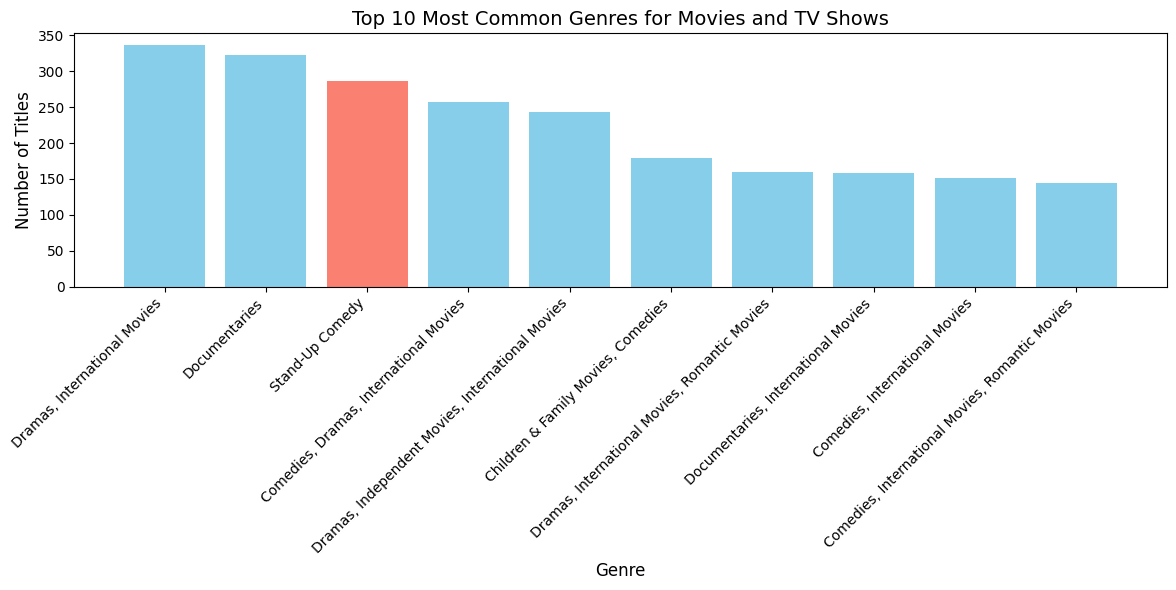

In [ ]:
# Prepare data
top_10_genres = sorted_genres[:10]
x_labels = [item[0] for item in top_10_genres]
y_values = [item[1] for item in top_10_genres]
colors = ['skyblue' if label == 'Movie' else 'salmon' for label in df['type']][:10]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x_labels, y_values, color=colors)

# Add labels and title
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Top 10 Most Common Genres for Movies and TV Shows", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## **`Question No 04:`** How has the average duration of movies and TV shows changed over the years?


In [ ]:
# Group by year and calculate mean duration
movie_durations = df_movies.groupby('release_year')['duration'].mean()
tv_durations = df_tv_shows.groupby('release_year')['duration'].mean()

In [ ]:
import plotly.express as px

# Create separate line plots for movies and TV shows
fig = px.line(movie_durations, y="duration", title="Average Movie Duration by Year", color_discrete_map = {'German Shephard': 'rgb(45,45,45)'}
)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Duration (minutes)"
)

fig2 = px.line(tv_durations, y="duration", title="Average TV Show Duration by Year")
fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Duration (minutes)"
)

# Display both plots
fig.show()
fig2.show()

In [ ]:
import plotly.express as px

# Create separate line plots for movies and TV shows
fig = px.bar(movie_durations, y="duration", title="Average Movie Duration by Year")
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Duration (minutes)"
)

fig2 = px.bar(tv_durations, y="duration", title="Average TV Show Duration by Year")
fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Duration (minutes)"
)

# Display both plots
fig.show()
fig2.show()

# **`5. Conclusion`**




## **5.1 Insights**
State the insights/outcomes of your project or notebook.

## **5.2 Suggestions**

Make suggestions based on insights.

## **5.3 Possible Next Steps**
Areas to expand on:
- (if there is any)

---

# *`6. Epilogue`*

## **6.1 References**

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date).

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

---

## **6.2 Information about the Author:**

[<img src="https://media.licdn.com/dms/image/D4D03AQH8PR9DDb3VxQ/profile-displayphoto-shrink_200_200/0/1713280211622?e=2147483647&v=beta&t=5TpzxNZJRmU3_zjNLoRb-O2V9amv1-1rwM5OczG01ZY" width="20%">](https://www.facebook.com/groups/codanics/permalink/1872283496462303/ "Image")


**Mr. ShaheerAli**

BS Computer Science\
[Youtube channel](https://www.youtube.com/channel/UCUTphw52izMNv9W6AOIFGJA)\
[Twitter](https://twitter.com/__shaheerali190)\
[Linkedin](https://www.linkedin.com/in/shaheer-ali-2761aa303/)\
[github](https://github.com/shaheeralics)\
[Kaggle](https://www.kaggle.com/shaheerali197)\
[Portfolio Website](https://shaheer.kesug.com)

## **6.3 Versioning**
Notebook and insights by (Mr.Shaheer Ali).
- Version: 1.5.0
- Date: 2023-05-15